In [4]:
import os
import tensorflow as tf
from tensorflow import keras

In [12]:
currentDir = os.getcwd()
data_dir = os.path.join(currentDir, 'chess')
data_queen = os.path.join(currentDir, 'chess', 'queen')
data_rook = os.path.join(currentDir, 'chess', 'rook')
data_knight = os.path.join(currentDir, 'chess', 'knight')
data_bishop = os.path.join(currentDir, 'chess', 'bishop')
data_pawn = os.path.join(currentDir, 'chess', 'pawn')

In [21]:
queen_names = os.listdir(data_queen)
print(queen_names[:10])

rook_names = os.listdir(data_rook)
print(rook_names[:10])
knight_names = os.listdir(data_knight)
print(knight_names[:10])

bishop_names = os.listdir(data_bishop)
print(bishop_names[:10])

pawn_names = os.listdir(data_pawn)
print(pawn_names[:10])


['00000000_resized.jpg', '00000001_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000007_resized.jpg', '00000008_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg', '00000012_resized.jpg']
['00000001_resized.jpg', '00000002_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000007_resized.jpg', '00000008_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg', '00000012_resized.jpg']
['00000001_resized.jpg', '00000002_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000007_resized.jpg', '00000009_resized.jpg', '00000010_resized.jpg', '00000011_resized.jpg']
['00000000_resized.jpg', '00000002_resized.jpg', '00000003_resized.jpg', '00000004_resized.jpg', '00000005_resized.jpg', '00000006_resized.jpg', '00000008_resized.jpg', '00000009_resized.jpg', '00000010_resized.jpg', '00000013_resized.jpg']
['00000001_resized.jpg', '00000002_r

In [19]:
lenth = 0
for dir in [data_queen, data_rook, data_knight, data_bishop, data_pawn]:
    lenth += len(os.listdir(dir))

print("total queen images: ", len(os.listdir(data_queen)))
print("total rook images: ", len(os.listdir(data_rook)))
print("total knight images: ", len(os.listdir(data_knight)))
print("total bishop images: ", len(os.listdir(data_bishop)))
print("total pawn images: ", len(os.listdir(data_queen)))
print("total images", lenth)

total queen images:  115
total rook images:  139
total knight images:  174
total bishop images:  141
total pawn images:  115
total images 651


In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 10
ncols = 4

# Index for iterating over images
pic_index = 0

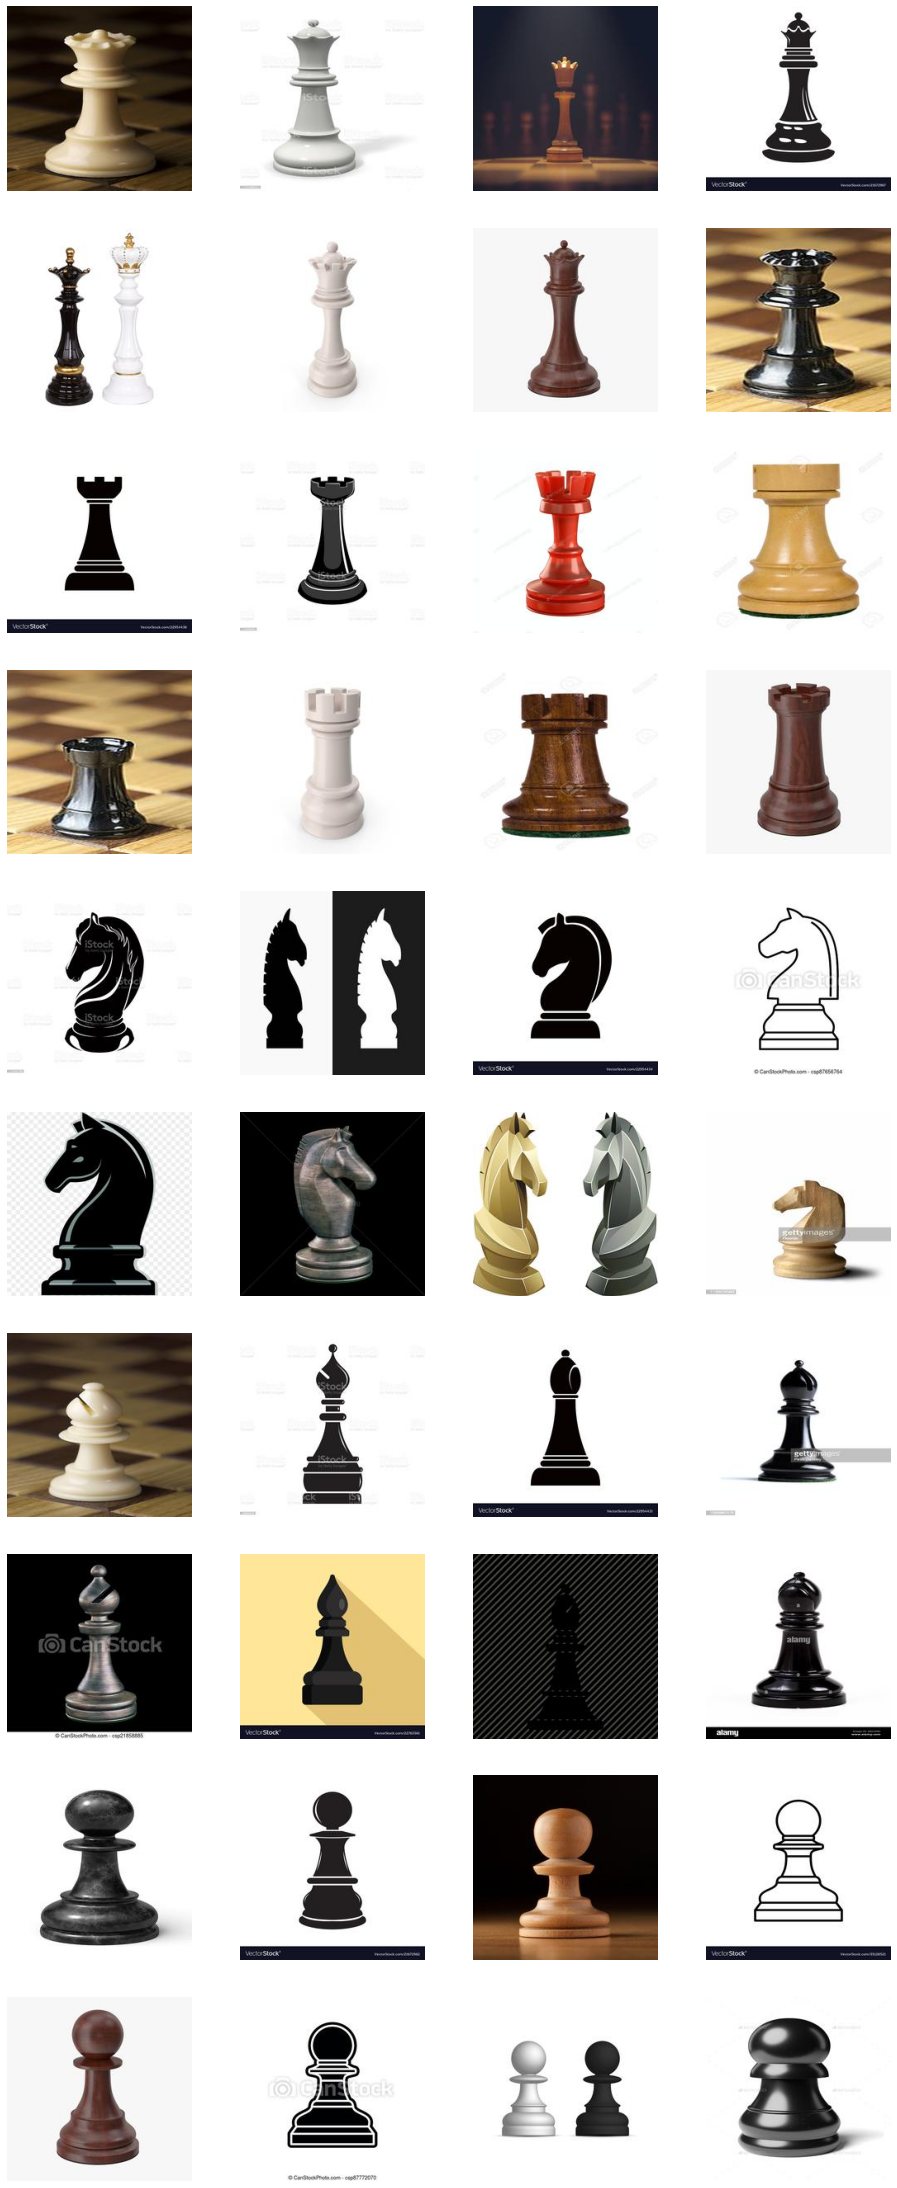

In [31]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_queen_pix = [os.path.join(data_queen, fname) 
                for fname in queen_names[pic_index-8:pic_index]]

next_rook_pix = [os.path.join(data_rook, fname) 
                for fname in rook_names[pic_index-8:pic_index]]

next_knight_pix = [os.path.join(data_knight, fname) 
                for fname in knight_names[pic_index-8:pic_index]]

next_bishop_pix = [os.path.join(data_bishop, fname) 
                for fname in bishop_names[pic_index-8:pic_index]]

next_pawn_pix = [os.path.join(data_pawn, fname) 
                for fname in pawn_names[pic_index-8:pic_index]]
pieces = []

for i, img_path in enumerate(next_queen_pix+next_rook_pix+next_knight_pix+next_bishop_pix+next_pawn_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [37]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

In [38]:
train_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset='training',
        shuffle=True)

validation_generator = train_datagen.flow_from_directory(
        data_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='categorical',
        subset='validation',
        shuffle=True)


Found 523 images belonging to 5 classes.
Found 128 images belonging to 5 classes.


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, 
                           input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 111, 111, 16)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 197136)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               25233536  
                                                                 
 dense_3 (Dense)             (None, 5)                 645       
                                                                 
Total params: 25,234,629
Trainable params: 25,234,629
Non-trainable params: 0
__________________________________________

In [35]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    steps_per_epoch=16
)

Epoch 1/5
16/16 [==============================] - 39s 2s/step - loss: 2.5627 - accuracy: 0.2424 - val_loss: 1.5899 - val_accuracy: 0.2500
Epoch 2/5
16/16 [==============================] - 30s 2s/step - loss: 1.5827 - accuracy: 0.2598 - val_loss: 1.5928 - val_accuracy: 0.2656
Epoch 3/5
16/16 [==============================] - 28s 2s/step - loss: 1.5979 - accuracy: 0.2749 - val_loss: 1.5806 - val_accuracy: 0.3281
Epoch 4/5
16/16 [==============================] - 26s 2s/step - loss: 1.5803 - accuracy: 0.2811 - val_loss: 1.5663 - val_accuracy: 0.2734
Epoch 5/5
16/16 [==============================] - 29s 2s/step - loss: 1.5687 - accuracy: 0.2912 - val_loss: 1.5735 - val_accuracy: 0.3203
